In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from datetime import datetime

# Read file of 2018, 2019

In [31]:
path18 = '../dataset/2018_BattLeDIM_Data_v1.1/2018 SCADA (CSV)/'
path19 = '../dataset/2019_BattLeDIM_Data_v1.0/2019 SCADA (CSV)/'
file = 'Flows.csv'
file_demand1 = 'Demands1.csv'
file_demand2 = 'Demands2.csv'
df18 = pd.read_csv(os.path.join(path18, file),
                     sep = ';',
                     parse_dates=['Timestamp'],
                     index_col='Timestamp'
                    )
df19 = pd.read_csv(os.path.join(path19, file),
                     sep = ';',
                     parse_dates=['Timestamp'],
                     index_col='Timestamp'
                    )
df_demand181 = pd.read_csv(os.path.join(path18, file_demand1),
                     sep = ';',
                     parse_dates=['Timestamp'],
                     index_col='Timestamp'
                    )
df_demand191 = pd.read_csv(os.path.join(path19, file_demand1),
                     sep = ';',
                     parse_dates=['Timestamp'],
                     index_col='Timestamp'
                    )
df_demand182 = pd.read_csv(os.path.join(path18, file_demand2),
                     sep = ';',
                     parse_dates=['Timestamp'],
                     index_col='Timestamp'
                    )
df_demand192 = pd.read_csv(os.path.join(path19, file_demand2),
                     sep = ';',
                     parse_dates=['Timestamp'],
                     index_col='Timestamp'
                    )
df = pd.concat([df18, df19])
df_demand = pd.concat([df_demand181, df_demand182, df_demand191, df_demand192])

In [32]:
# transfer comma (3,14) to point (3.14)
def comma_to_point(x):
    return float(x.replace(',','.'))
for i in list(df.columns):
    df[i] = df[i].apply(comma_to_point)
    
for j in list(df_demand181.columns):
    df_demand[j] = df_demand[j].apply(comma_to_point)

In [4]:
df.head(5)

,p227,p235,PUMP_1
Timestamp,,,
2018-01-01 00:00:00,77.77,83.93,44.04
2018-01-01 00:05:00,72.51,76.34,44.06
2018-01-01 00:10:00,71.54,78.68,44.06
2018-01-01 00:15:00,69.85,75.50,44.07
2018-01-01 00:20:00,77.12,82.99,44.03


In [5]:
df_demand.head(5)

,n1,n2,n3,n4,n6,n7,n8,n9,n10,n11,...,n379,n381,n382,n383,n384,n385,n386,n387,n388,n389
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,40.83,112.23,96.71,131.29,166.18,81.92,249.95,489.63,58.83,495.98,...,33.41,150.82,67.61,65.82,65.25,57.39,214.20,81.49,256.50,92.14
2018-01-01 00:05:00,40.20,166.05,239.53,136.21,154.48,372.14,190.56,171.60,38.02,142.36,...,78.90,97.46,95.29,50.18,81.29,49.67,109.14,104.46,394.48,203.61
2018-01-01 00:10:00,38.06,121.91,69.12,131.00,160.10,320.79,242.07,39.35,52.79,225.65,...,100.26,135.33,178.10,63.74,252.94,9.69,285.82,94.32,337.33,93.11
2018-01-01 00:15:00,37.24,33.15,139.01,155.02,244.34,335.55,128.87,252.95,34.28,0.00,...,80.80,87.88,51.60,33.93,139.25,36.15,183.66,57.27,268.74,96.19
2018-01-01 00:20:00,45.38,122.55,72.13,148.66,257.18,382.41,259.25,318.29,69.56,232.08,...,59.57,178.33,79.05,68.27,43.76,22.05,226.42,140.88,423.29,96.87


# Decomposition

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
freq = 24*12
def analyse(df):
    freq = 24*12
    decomposition = seasonal_decompose(x=df.dropna(), model='additive', freq=freq)
    seasonal_day = decomposition.seasonal
    trend_day = decomposition.trend
    resi_day = decomposition.resid

    decomposition2 = seasonal_decompose(x=trend_day.dropna(), model='additive', freq=freq*7)
    seasonal_week = decomposition2.seasonal
    trend_week = decomposition2.trend
    resi_week = decomposition2.resid
    return trend_week

df1 = df['p235']
trend_week1 = analyse(df1)
df2 = df['p227']
trend_week2 = analyse(df2)

df_demand['sum'] = df_demand.sum(axis=1)
df3 = df_demand['sum']
trend_demand = analyse(df3)

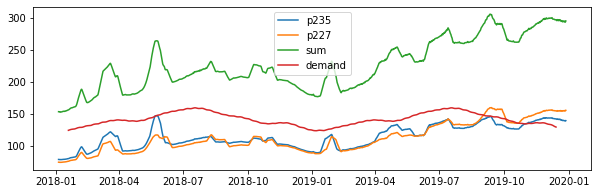

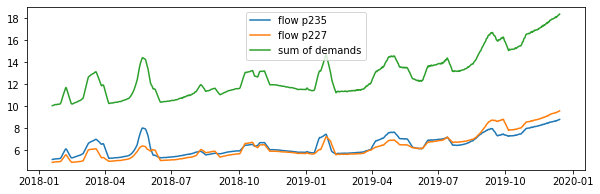

In [8]:
 from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
trend_demand_rolled = trend_demand.rolling(12*24*7*4, center=True).mean()

plt.figure(figsize=(10,3),facecolor='w')
plt.plot(trend_week1)
plt.plot(trend_week2)
plt.plot(trend_week1+trend_week2)
plt.plot(trend_demand_rolled/1000*8)
plt.legend(['p235','p227','sum', 'demand'])

plt.figure(figsize=(10,3),facecolor='w')
plt.plot(trend_week1/trend_demand_rolled*1000)
plt.plot(trend_week2/trend_demand_rolled*1000)
plt.plot((trend_week1+trend_week2)/trend_demand_rolled*1000)
plt.legend(['flow p235','flow p227', 'sum of demands'])

# read leakages

In [9]:
leakage_info = pd.read_excel('../result/result.xlsx',
                             parse_dates=['Leak Start','Leak End'])
leakage_info.head(5)

,Leak Type,Leak Start,Leak End,Peak Time,DMA
0,incipient_unfix,2018-01-08 13:30:00,2018-12-31 23:55:00,2018-01-25 08:30:00,C
1,incipient,2018-01-23 04:25:00,2018-04-02 11:40:00,2018-03-27 20:35:00,A
2,incipient,2018-01-31 02:35:00,2018-02-10 09:20:00,2018-02-03 16:05:00,A
3,incipient_unfix,2018-02-13 08:25:00,2018-12-31 23:55:00,2018-05-14 19:25:00,A
4,abrupt,2018-03-05 15:45:00,2018-03-23 10:25:00,2018-03-05 15:45:00,B


# Flow curve and leakages

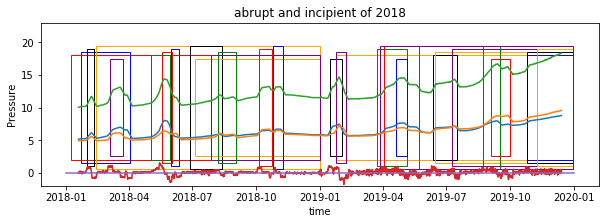

In [12]:
from matplotlib.patches import Rectangle
from datetime import timedelta
from matplotlib.collections import PatchCollection

plt.figure(figsize=(10,3),facecolor='w')
plt.plot(trend_week1/trend_demand_rolled*1000)
plt.plot(trend_week2/trend_demand_rolled*1000)
plt.plot((trend_week1+trend_week2)/trend_demand_rolled*1000)

plt.plot(( (trend_week1+trend_week2)/trend_demand_rolled*1000).diff()*1000)
plt.plot([trend_week1.index[0],trend_week1.index[-1]], [0,0])

color_list = ['green','red','blue','black','orange','purple']
height_list = [15,16,17,18,19]
start_list = [(20-i)/2 for i in height_list]
ax = plt.gca()

m = 0
for i in range(0, leakage_info.shape[0]):
    start = leakage_info.iloc[i]['Leak Start']
    timedelta = leakage_info.iloc[i]['Leak End'] - start
    leaktype = leakage_info.iloc[i]['Leak Type']
    if leaktype != ' aincipient_unfix':
        m += 1
        DMA = leakage_info.iloc[i]['DMA']

        ax.add_patch(Rectangle( (start,start_list[m%5]), 
                               timedelta, height_list[m%5], 
                               fill=False, color=color_list[m%6]))
#     plt.text(start+timedelta/2, 19+8+height_list[i%5]+0.5, leaktype, ha='center', va= 'bottom',fontsize=7)
ax.set_ylim([-2, 23])
plt.xlabel('time')
plt.ylabel('Pressure')
plt.title('abrupt and incipient of 2018')
# plt.savefig('./abrupt and incipient of 2018 2019 vs flow.png', format='png',dpi=600)
plt.show()

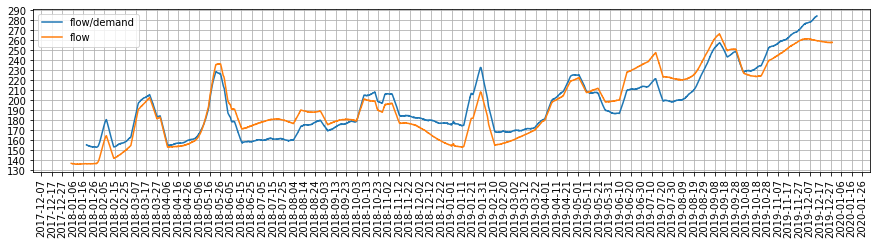

In [16]:
plt.figure(figsize=(15,3),facecolor='w')
myflow = (df['p227']+df['p235']-df['PUMP_1']).rolling(12*24*7, center=True).mean()
myflow2 = myflow/trend_demand_rolled*(trend_demand_rolled.mean())
plt.plot(myflow2)
plt.plot(myflow)
import pylab as pl
import matplotlib.ticker as ticker
ax = plt.gca()
pl.xticks(rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
plt.legend(['flow/demand','flow'])
plt.grid() 
# plt.savefig('./flow read incipient 2018 2019.png',format='png',dpi=600)

(130, 340)

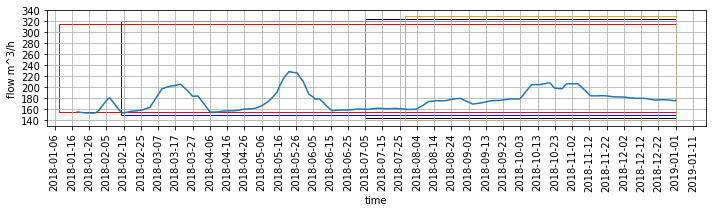

In [17]:
from matplotlib import pyplot as pl
plt.figure(figsize=(10,3),facecolor='w')
# /trend_demand_rolled*10000)
myflow = (df['p227']+df['p235']-df['PUMP_1']).rolling(12*24*7, center=True).mean()
myflow = myflow/trend_demand_rolled*(trend_demand_rolled.mean())

plt.plot( myflow.head(int(df.shape[0]/2)) )
ax = plt.gca()
pl.xticks(rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

ax.yaxis.set_major_locator(ticker.MultipleLocator(20)) # 155-
plt.xlabel('time')
plt.ylabel('flow m^3/h')
color_list = ['green','red','blue','black','orange','purple']
height_list = [150,160,170,180,190]
start_list = [(470-i)/2 for i in height_list]
ax = plt.gca()

m = 0
for i in range(0, leakage_info.shape[0]):
    start = leakage_info.iloc[i]['Leak Start']
    timedelta = leakage_info.iloc[i]['Leak End'] - start
    leaktype = leakage_info.iloc[i]['Leak Type']
    if leaktype == ' incipient_unfix':
        m += 1
        DMA = leakage_info.iloc[i]['DMA']

        ax.add_patch(Rectangle( (start,start_list[m%5]), 
                               timedelta, height_list[m%5], 
                               fill=False, color=color_list[m%6]))
plt.grid() 
plt.tight_layout()
plt.ylim([130, 340])
# plt.savefig('./read incipient 2018.png',format='png',dpi=600)

# 2019年数据

### 界定漏损时间

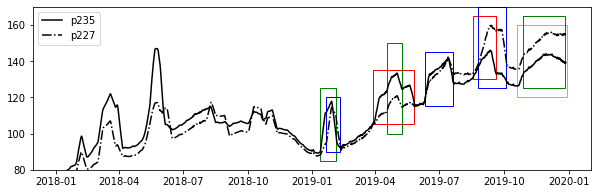

In [19]:
plt.figure(figsize=(10,3),facecolor='w')

from matplotlib.patches import Rectangle
from datetime import timedelta
from matplotlib.collections import PatchCollection
   
fig = plt.gcf()
ax = plt.gca()
ax.plot(trend_week1,'black')
ax.plot(trend_week2,'black',linestyle='-.')
ax.legend(['p235','p227'])
ax.set_ylim([80, 170])
ax.add_patch(Rectangle((datetime(2019,1,12),85), timedelta(days=23), 40, fill=False, color='g'))
ax.add_patch(Rectangle((datetime(2019,1,21),90), timedelta(days=19), 30, fill=False, color='blue'))

ax.add_patch(Rectangle((datetime(2019,3,29),105), timedelta(days=58), 30, fill=False, color='r'))
ax.add_patch(Rectangle((datetime(2019,4,18),100), timedelta(days=21), 50, fill=False, color='g'))

ax.add_patch(Rectangle((datetime(2019,6,10),115), timedelta(days=40), 30, fill=False, color='blue'))

ax.add_patch(Rectangle((datetime(2019,8,18),130), timedelta(days=32), 35, fill=False, color='r'))
ax.add_patch(Rectangle((datetime(2019,8,25),125), timedelta(days=40), 45, fill=False, color='blue'))

ax.add_patch(Rectangle((datetime(2019,10,20),120), timedelta(days=70), 40, fill=False, color='orange'))
ax.add_patch(Rectangle((datetime(2019,10,28),125), timedelta(days=60), 40, fill=False, color='green'))

# plt.savefig('./analyse2.png',format='png',dpi=1000)
plt.show()

# 3 sigma 算法

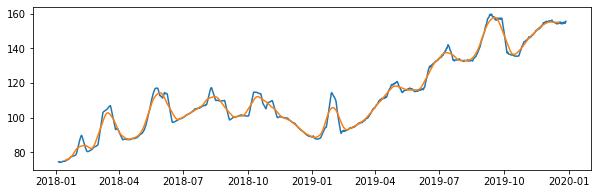

In [23]:
# trend_week2
col = 'p235'
rolling_trend = trend_week2.dropna().rolling(24*12*20, center=True).mean().dropna()
sigma = (trend_week2 - rolling_trend)**2
normalized_sigma = sigma/(sigma.mean())

plt.figure(figsize=(10,3),facecolor='w')
# plt.plot(seasonal_week)
plt.plot(trend_week2)
plt.plot(rolling_trend)


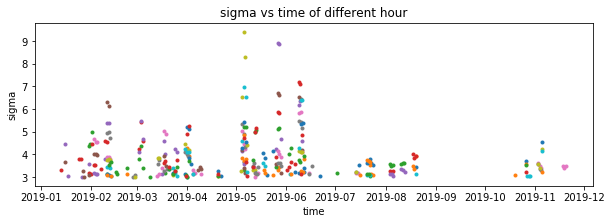

In [36]:
# df[col]
dfsig = df[col].tail(int(df.shape[0]/2)).rolling(12,center=True).mean()[::12]
plt.figure(figsize=(10,3),facecolor='w')
res_list = []
df_res = None
for i in range(0,24):
    df_hour = dfsig.dropna()[i::24]
    df_hour_mean = df_hour.rolling(20, center=True).mean().dropna()
    sigma = (df_hour - df_hour_mean)**2
    sigma = sigma/(sigma.mean())
    sigma = sigma.rolling(3, center=True).mean()
    res = sigma[sigma>3]
    plt.scatter(res.index, res, marker='.')
    res_list += [res]
        
# plt.legend([str(i) + ' hour' for i in range(0,24)])
plt.ylabel('sigma')
plt.xlabel('time')
plt.title('sigma vs time of different hour')
# plt.savefig('./sigma vs time.png', format='png',dpi=1000)
plt.show()

Text(0.5, 1.0, 'sigma vs time of different hour')

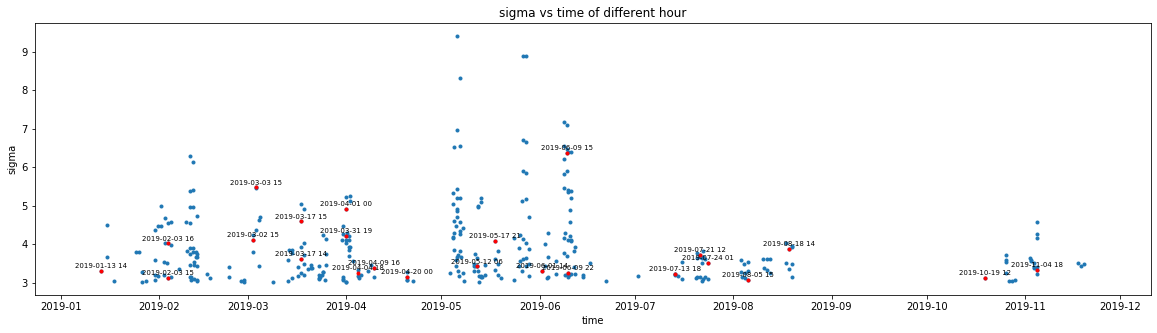

In [38]:
df_res = pd.concat(res_list)
df_res = df_res.sort_index()
plt.figure(figsize=(20,5), facecolor='w')
plt.scatter(df_res.index, df_res, marker='.')
i_list = [0,22,23,66,69,82,83,116,120,133,138,140,184,200,230,250,257,280,290,300,310,320,325,340]
for i in i_list:
    x = df_res.index[i]
    y = df_res[i]
    if i == 133:
        y += 0.1
    plt.scatter(x,y, marker='.',color='red')
    plt.text(x, y+0.05, str(x)[:-6], ha='center', va= 'bottom',fontsize=7)
plt.ylabel('sigma')
plt.xlabel('time')
plt.title('sigma vs time of different hour')
# plt.savefig('./sigma vs time and text.png', format='png',dpi=1000)

Text(0.5, 1.0, 'sigma vs time of different hour')

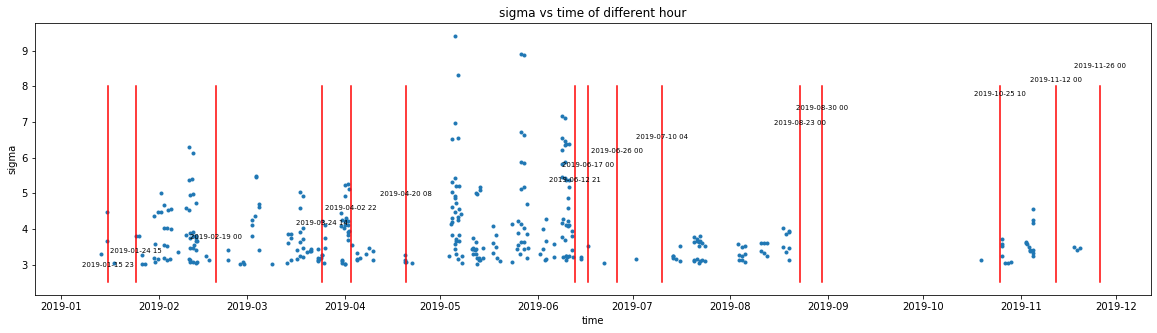

In [39]:
wxt_res = [datetime(2019,1,15,23,20,0),
           datetime(2019,1,24,15,50,0),
           datetime(2019,2,19,0,0,0),
           datetime(2019,3,24,14,0,0),
           datetime(2019,4,2,22,0,0),
           datetime(2019,4,20,8,30,0),
           datetime(2019,6,12,21,0,0),
           datetime(2019,6,17,0,0,0),
           datetime(2019,6,26,0,0,0),
           datetime(2019,7,10,4,30),
           datetime(2019,8,23,0,0,0),
           datetime(2019,8,30,0,0,0),
           datetime(2019,10,25,10,0,0),
           datetime(2019,11,12,0,0,0),
           datetime(2019,11,26,0,0,0),
          ]

df_res = pd.concat(res_list)
df_res = df_res.sort_index()
plt.figure(figsize=(20,5), facecolor='w')
plt.scatter(df_res.index, df_res, marker='.')
# i_list = [0,22,23,66,69,82,83,116,120,133,138,140,184,200,230,250,257,280,290,300,310,320,325,340,360,375]
y = 2.5
for i in wxt_res:
    x = i
    y +=0.4
    plt.plot([x,x],[2.5,8],'red')
    plt.text(x, y, str(x)[:-6], ha='center', va= 'bottom',fontsize=7)
plt.ylabel('sigma')
plt.xlabel('time')
plt.title('sigma vs time of different hour')
# plt.savefig('./sigma vs time wxt.png', format='png',dpi=1000)

# 漏点和水量

Text(0.5, 1.0, 'flow vs time')

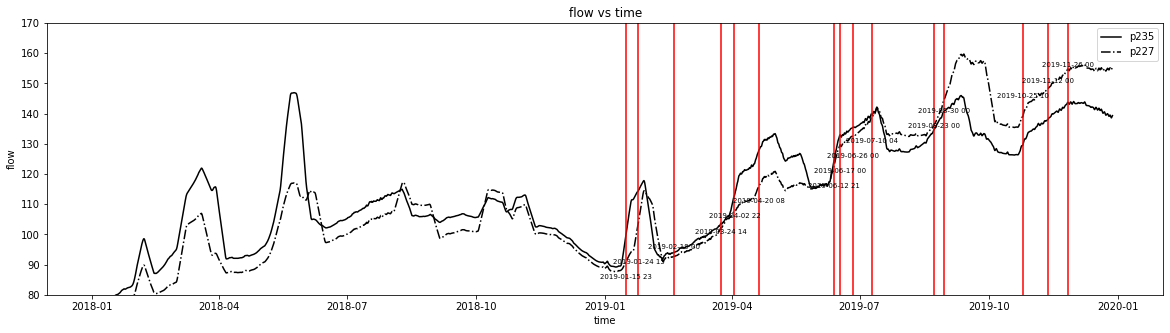

In [40]:
plt.figure(figsize=(20,5),facecolor='w') 
fig = plt.gcf()
ax = plt.gca()
ax.plot(trend_week1,'black')
ax.plot(trend_week2,'black',linestyle='-.')
ax.legend(['p235','p227'])
ax.set_ylim([80, 170])
y = 80
for i in wxt_res:
    x = i
    y +=5
    plt.plot([x,x],[80,170],'red')
    plt.text(x, y, str(x)[:-6], ha='center', va= 'bottom',fontsize=7)
plt.ylabel('flow')
plt.xlabel('time')
plt.title('flow vs time')
# plt.savefig('./flow vs time wxt.png', format='png',dpi=1000)

# 画四个水量

In [2]:
import pandas as pd
import pylab as pl
import matplotlib.ticker as ticker
import matplotlib as mpl

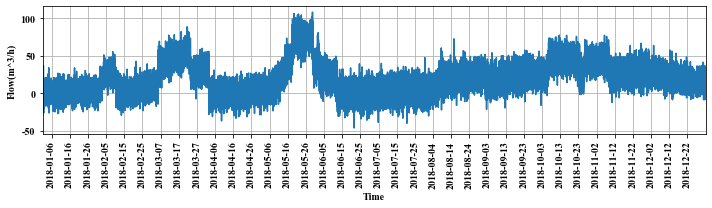

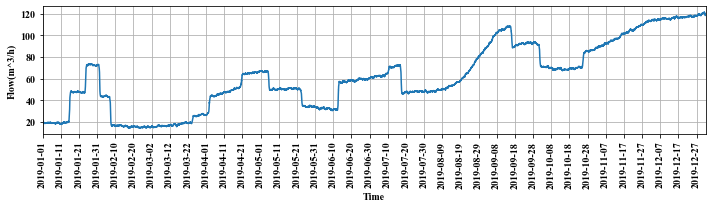

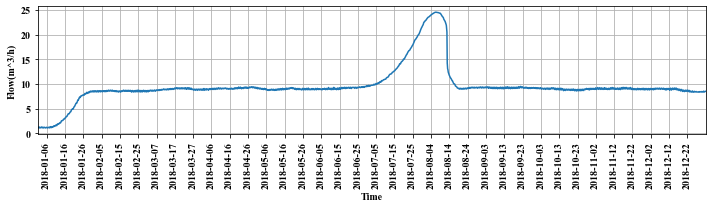

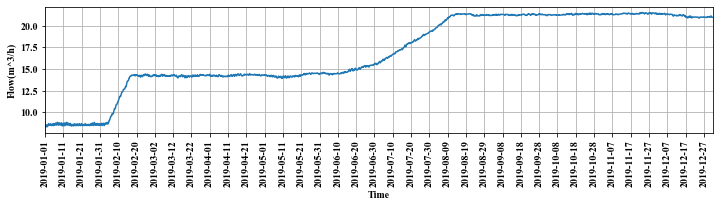

In [16]:
mpl.rcParams['agg.path.chunksize'] = 10000
for tb in ['total_difference_table_ab_2018.xlsx','total_difference_table_ab_2019.xlsx',
           'total_difference_table_c_2018.xlsx','total_difference_table_c_2019.xlsx']:
    tb_c = pd.read_excel(os.path.join('./赛题数据/总分表差_对数变换/总分表差_对数变换', tb),
                    sheet_name='diff',
                    parse_dates=['Timestamp'],
                    index_col='Timestamp')
    plt.figure(figsize=(10,3),facecolor='w')
    plt.plot(tb_c[::2])
    ax = plt.gca()
    pl.xticks(rotation=90)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
    plt.grid() 
#     ax.yaxis.set_major_locator(ticker.MultipleLocator(5)) # 155-
    plt.xlabel('Time')
    plt.ylabel('Flow(m^3/h)')
    plt.xlim([tb_c.index[0],tb_c.index[-1]])
    plt.tight_layout()
#     plt.savefig('./'+tb+'.png',format='png',dpi=800)

# 画2018年水量和滑动平均

In [ ]:
tb_c = pd.read_excel(os.path.join('./赛题数据/总分表差_对数变换/总分表差_对数变换',
                                  'total_difference_table_ab_2018.xlsx',),
                    sheet_name='diff',
                    parse_dates=['Timestamp'],
                    index_col='Timestamp')

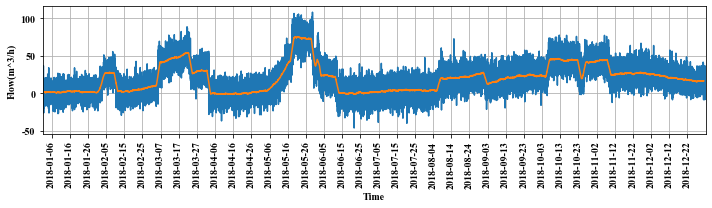

In [15]:
plt.figure(figsize=(10,3),facecolor='w')
plt.plot(tb_c[::2])
plt.plot(tb_c[::2].rolling(12*24, center=True).mean())
ax = plt.gca()
pl.xticks(rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.grid() 
#     ax.yaxis.set_major_locator(ticker.MultipleLocator(5)) # 155-
plt.xlabel('Time')
plt.ylabel('Flow(m^3/h)')
plt.xlim([tb_c.index[0],tb_c.index[-1]])
plt.tight_layout()
# plt.savefig('./'+'total_difference_table_ab_2018.xlsx'+'.png',format='png',dpi=800)

# 画出水力学模型和实测值比较

In [ ]:
tb_c = pd.read_excel(os.path.join('./赛题数据/总分表差_对数变换/总分表差_对数变换',
                                  'total_difference_table_ab_2018.xlsx',),
                    sheet_name='demand_inflow',
                    parse_dates=['Timestamp'],
                    index_col='Timestamp')

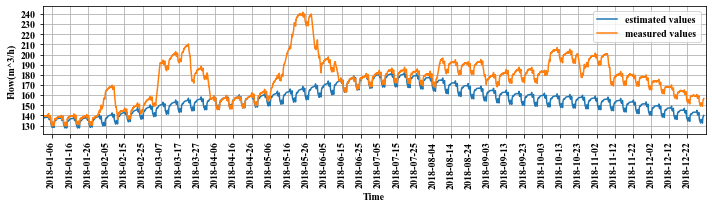

In [13]:
import matplotlib as mpl

mpl.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Times New Roman'],
    })  # 设置全局字体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.figure(figsize=(10,3),facecolor='w')
# plt.plot(tb_c[::2])
plt.plot(tb_c[::2].rolling(12*24, center=True).mean())
ax = plt.gca()
pl.xticks(rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.grid() 
ax.yaxis.set_major_locator(ticker.MultipleLocator(10)) # 155-
plt.xlabel('Time')
plt.ylabel('Flow(m^3/h)')
plt.xlim([tb_c.index[0],tb_c.index[-1]])
plt.legend(['estimated values','measured values'])
plt.tight_layout()
# plt.savefig('./'+'total_difference_table_ab_2018.xlsx'+'observ vs pred.png',format='png',dpi=800)

# 画出2019 A区流量

In [22]:
tb_ab = pd.read_excel('./赛题数据/total_difference_table_ab_2019.xlsx',
                     sheet_name='diff',
                     parse_dates=['Timestamp'],
                     index_col='Timestamp')

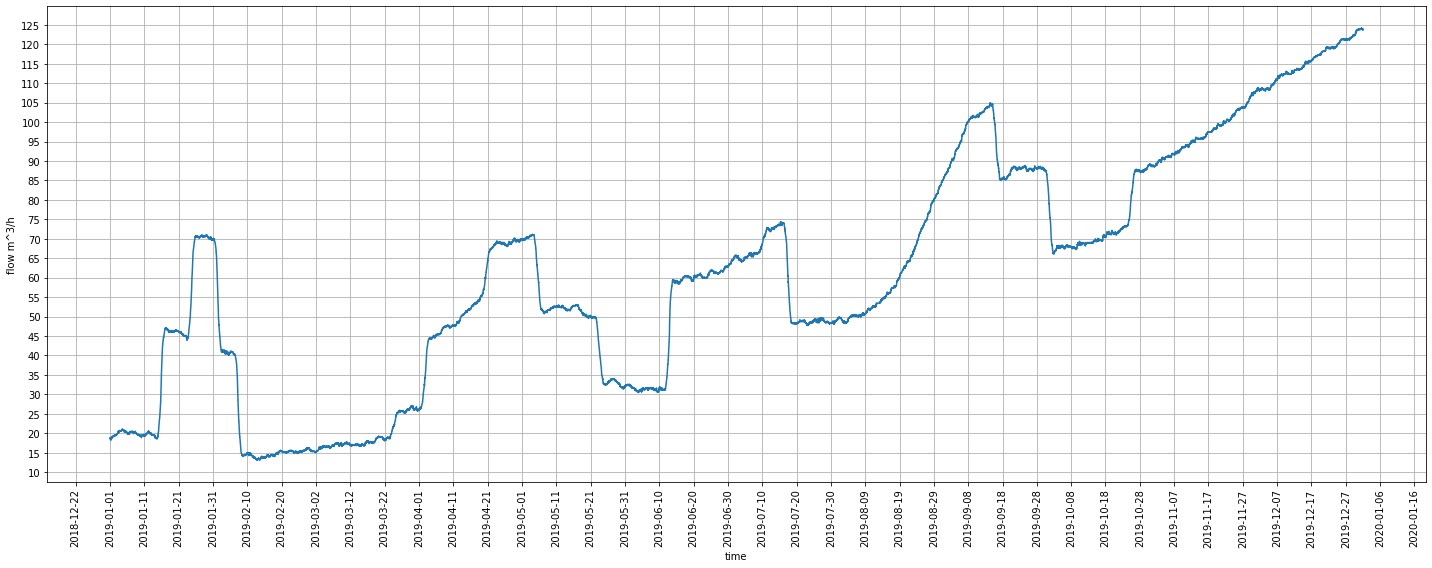

In [25]:
plt.figure(figsize=(20,8),facecolor='w')
plt.plot(tb_ab)
ax = plt.gca()
pl.xticks(rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.grid() 
ax.yaxis.set_major_locator(ticker.MultipleLocator(5)) # 155-
plt.xlabel('time')
plt.ylabel('flow m^3/h')
plt.tight_layout()
# plt.savefig('./xipeng2.png',format='png',dpi=1000)

# 画出2018,2019 demand总和

In [48]:
df_tre18 = pd.read_excel('./赛题数据/2018_BattLeDIM_Data_v1.1/2018 SCADA.xlsx', sheet_name='Demands (L_h)',
                        parse_dates=['Timestamp'],
                        index_col='Timestamp')
x1 = df_tre18.sum(axis=1)

In [40]:
df_tre19 = pd.read_excel('./赛题数据/2019_BattLeDIM_Data_v1.0/2019 SCADA.xlsx',
                         sheet_name='Demands (L_h)',
                        parse_dates=['Timestamp'],
                        index_col='Timestamp')
x2 = df_tre19.sum(axis=1)

In [65]:
y1 = analyse(x1)
y2 = analyse(x2)

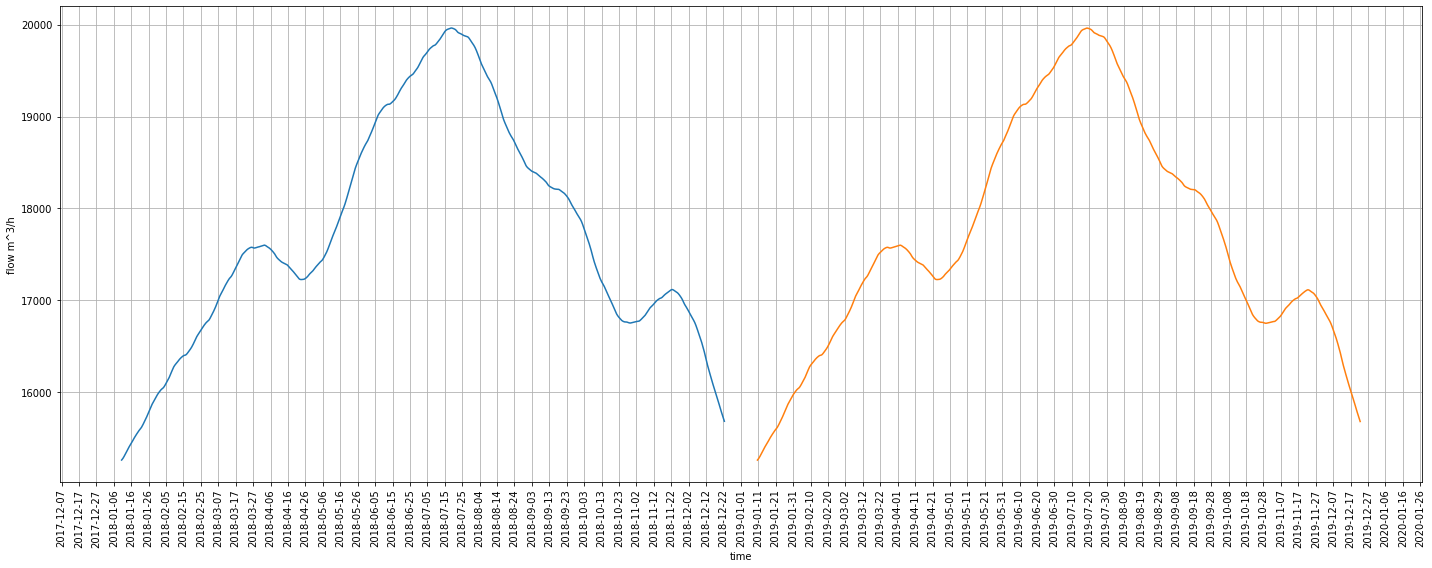

In [70]:
y11 = y1.rolling(12*24*11, center=True).mean()
y22 = y2.rolling(12*24*11, center=True).mean()

plt.figure(figsize=(20,8),facecolor='w')
plt.plot(y11)
plt.plot(y22)

ax = plt.gca()
pl.xticks(rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.grid() 
# ax.yaxis.set_major_locator(ticker.MultipleLocator(5)) # 155-
plt.xlabel('time')
plt.ylabel('flow m^3/h')
plt.tight_layout()
plt.savefig('./trend 2018 2019 in DMA-C.png',format='png',dpi=1000)

In [71]:
y = pd.concat([y11, y22])

In [72]:
y.to_csv('./trend 2018 2019 in DMA-C.csv')

G:\Anaconda\envs\pytorch_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


# 滑动差分

In [18]:
cfdf = pd.read_excel('./滑动差分.xlsx',
                        #sheet_name='Demands (L_h)',
                        parse_dates=['Timestamp'],
                        index_col='Timestamp')

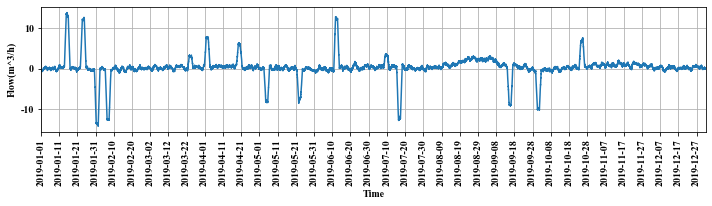

In [21]:
plt.figure(figsize=(10,3),facecolor='w')
plt.plot(cfdf)
# plt.plot(y22)
ax = plt.gca()
pl.xticks(rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.grid() 
# ax.yaxis.set_major_locator(ticker.MultipleLocator(5)) # 155-
plt.xlabel('Time')
plt.ylabel('Flow(m^3/h)')
plt.xlim([cfdf.index[0], cfdf.index[-1]])
plt.tight_layout()
plt.savefig('./滑动差分.png',format='png',dpi=1000)